# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [150]:
df = pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### Check the shape of the dataset

In [151]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [153]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

# Univariate Analysis

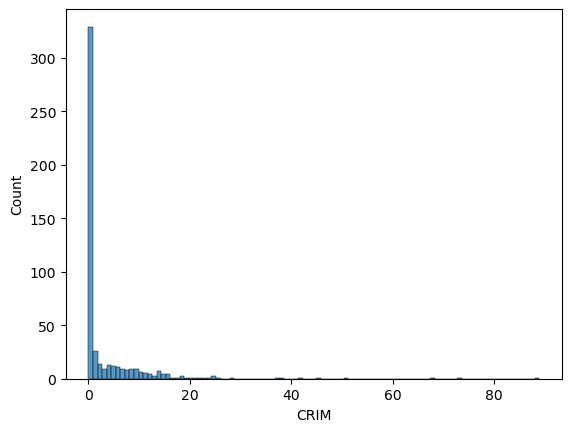

In [154]:
sns.histplot(data = df, x = "CRIM");

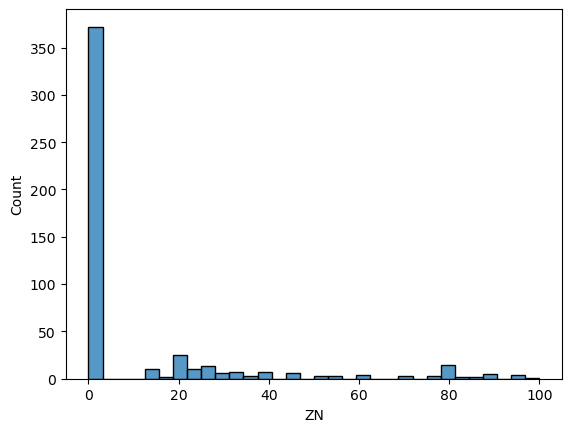

In [155]:
sns.histplot(data = df, x = "ZN");

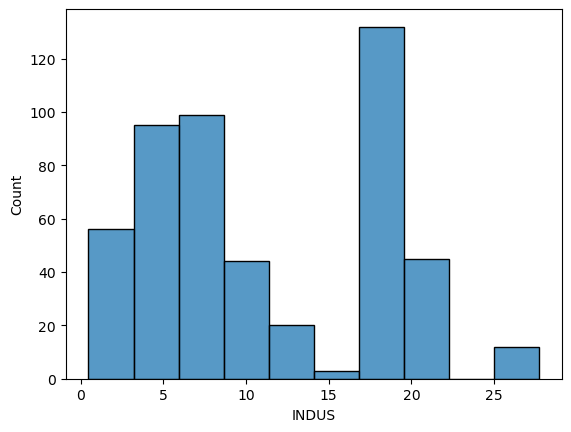

In [156]:
sns.histplot(data = df, x = "INDUS");

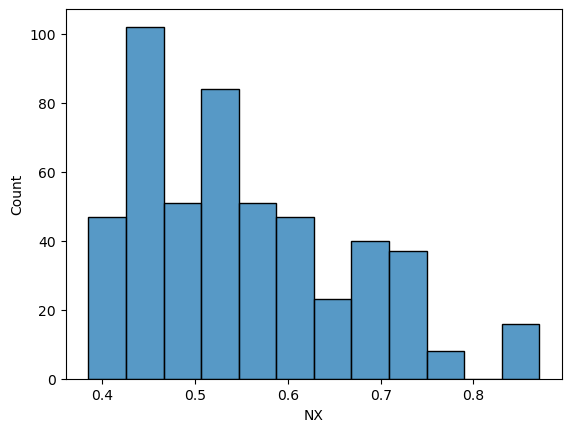

In [158]:
sns.histplot(data = df, x = "NX");

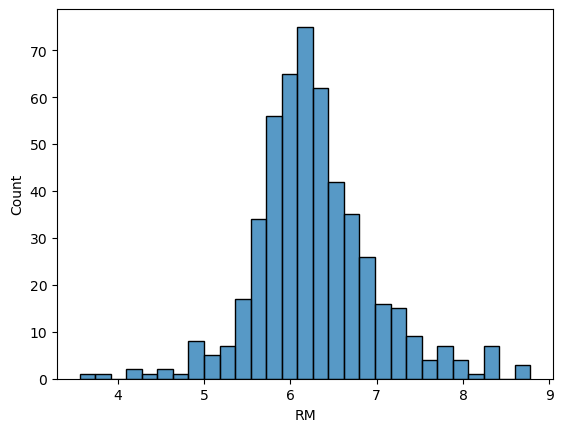

In [159]:
sns.histplot(data = df, x = "RM");

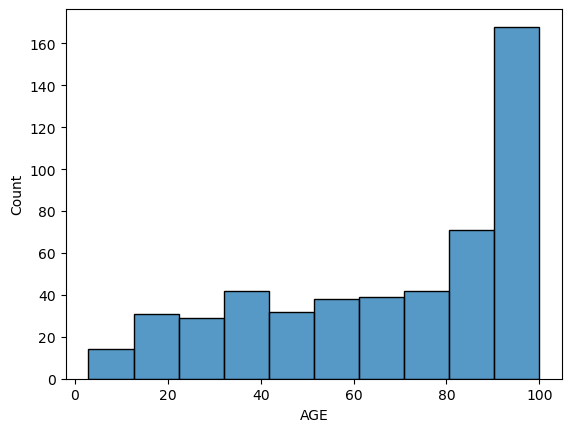

In [160]:
sns.histplot(data = df, x = "AGE");

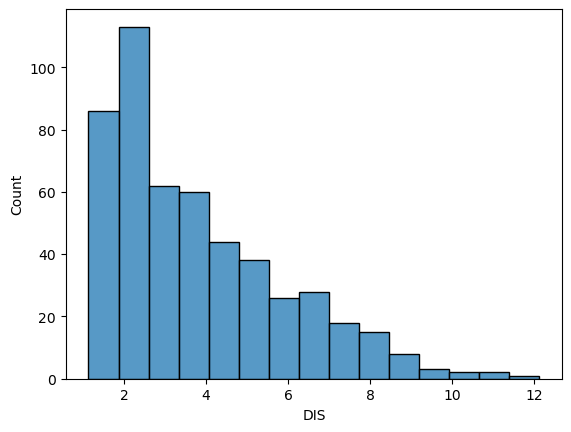

In [161]:
sns.histplot(data = df, x = "DIS");

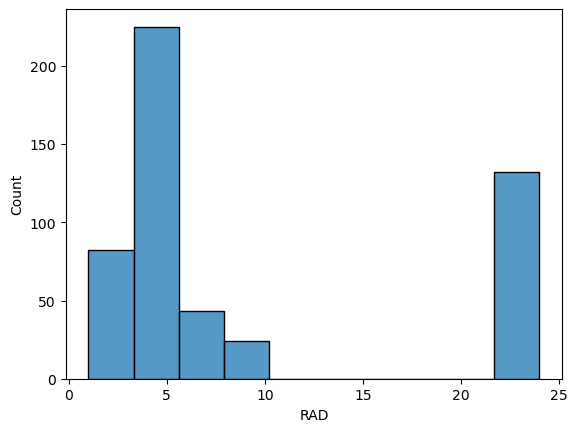

In [162]:
sns.histplot(data = df, x = "RAD");

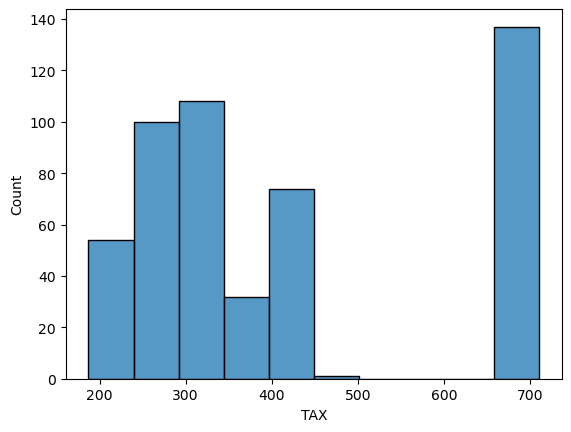

In [163]:
sns.histplot(data = df, x = "TAX");

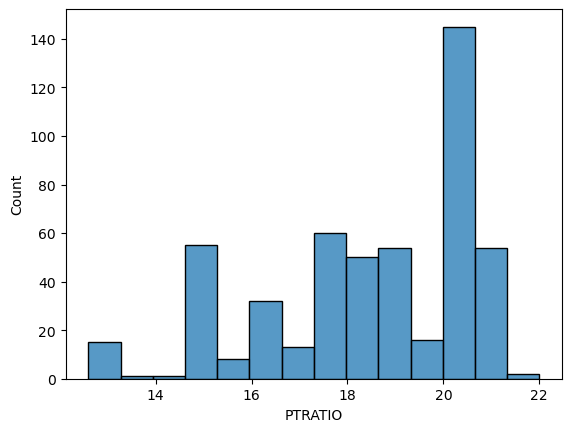

In [164]:
sns.histplot(data = df, x = "PTRATIO");

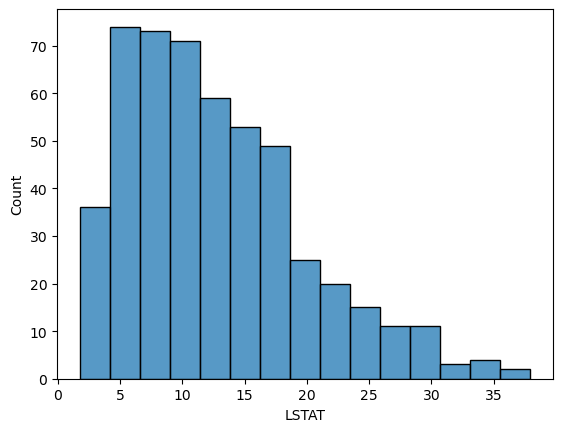

In [165]:
sns.histplot(data = df, x = "LSTAT");

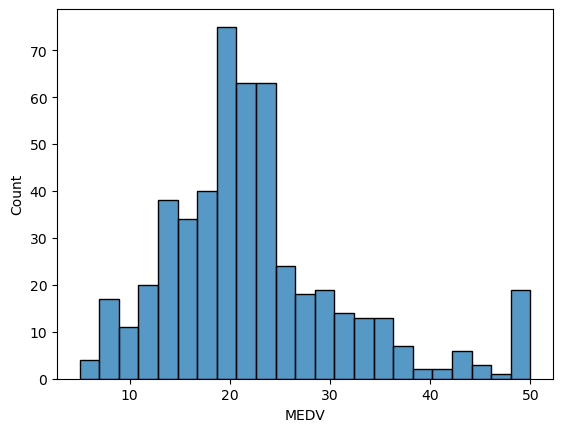

In [166]:
sns.histplot(data = df, x = "MEDV");

# From the above Univariate Analyses, it is observed that only the  average number of rooms per dwelling(RM) is normally distributed 

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

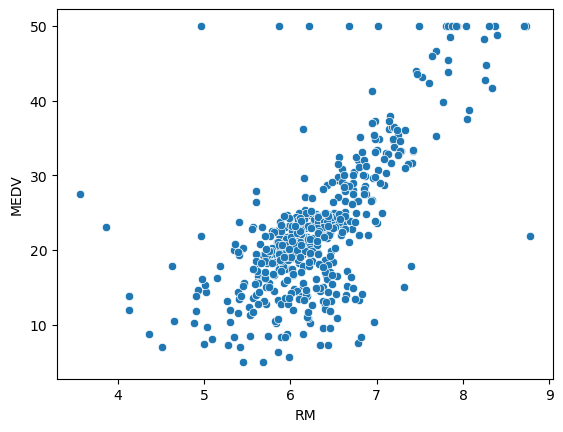

In [167]:
sns.scatterplot(data = df, x = "RM", y = "MEDV");

**Plot the correlation heatmap and list your observations.**

In [168]:
mat_corr = df.corr()

In [169]:
mat_corr

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


<Axes: >

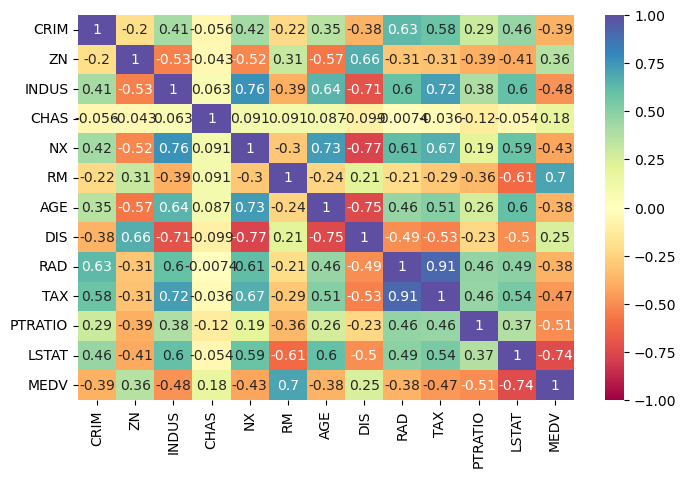

In [170]:
# create a heatmap for the correlation
plt.figure(figsize = (8, 5))
sns.heatmap(mat_corr, vmin = -1, vmax = 1, cmap = "Spectral", annot=True)

# Observations

The Target has a strong positive relationship with the average number of rooms per dwelling(RM). It equally has a storng negative relationship with the %lower status of the population(LSTAT). There exist multicollinearity between TAX and RAD, between TAX and NX, between TAX and INDUS, between LSTAT and RM

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [171]:
# select features needed for building the models
X = df.drop(["MEDV", "CHAS"], axis=1)
y = df["MEDV"]

In [172]:
X.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [173]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [174]:
# import the function to split the data
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
# check the dimension of the train and test data
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (404, 11)
Testing shape: (102, 11)


In [176]:
# standardize the training and test data
from sklearn.preprocessing import MinMaxScaler

In [177]:
# create an instance of the scaler class
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [178]:
X_train_scaled

array([[0.00395381, 0.        , 0.21041056, ..., 0.22900763, 0.5106383 ,
        0.22638298],
       [0.00171339, 0.        , 0.37939883, ..., 0.22519084, 0.70212766,
        0.23120567],
       [0.00120232, 0.3       , 0.1638563 , ..., 0.21564885, 0.42553191,
        0.27375887],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.46755725, 0.55319149,
        0.24312057],
       [0.0025059 , 0.        , 0.23643695, ..., 0.08778626, 0.56382979,
        0.48425532],
       [0.00149286, 0.        , 0.13159824, ..., 0.20801527, 0.42553191,
        0.36765957]])

### Model Building

**Fit the model to the training set**

In [179]:
# import the linear regression algorithm
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# fit the model
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [180]:
# get the coefficient and the intercept
lin_reg.coef_

array([-11.27420527,   4.57769564,   0.43588469,  -8.41790441,
        18.85122704,   0.22624951, -15.66251269,   5.63068637,
        -6.49196613,  -9.93527866, -18.78183854])

**Get the score on test set**

**Get the RMSE on test set**

**Get the model coefficients.**

**Automate the equation of the fit**